In [74]:
import pandas as pd
from scipy.stats import levene, ttest_ind, shapiro, boxcox
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv("amazon-originals-rating-manipulation/data/all_ratings_data.csv")
amazon_orig_df = pd.read_csv("data/amazon_shows.csv", usecols=['title'])
amazon_orig_df['title'] = amazon_orig_df['title'].apply(lambda x: x.strip())
amazon_exclusive_df = pd.read_csv("data/amazon_exclusive.csv", usecols=['title'])
amazon_exclusive_df['title'] = amazon_exclusive_df['title'].apply(lambda x: x.strip())
amazon_df = pd.concat([amazon_orig_df,amazon_exclusive_df], ignore_index=True)
amazon_df = amazon_orig_df
# round and scale down
df['tmdb_rating'] = df['tmdb_rating'].round().astype(int)
df[ ['tmdb_rating', 'trakt_rating']] = df[ ['tmdb_rating', 'trakt_rating']] / 10
df['metacritic_rating'] = ((df['metacritic_rating'] - 0) * (10 - 1) / (10 - 0)) + 1

df = df[df['metascore'] != 'tbd']
#df['metascore'] = df['metascore'].apply(lambda x: int(float(x)) if isinstance(x, (float, str)) and '.' in str(x) else x)

df['metascore'] = df['metascore'].astype('float64')
df['metascore'] = df['metascore'] / 10
df = df[df['metascore'] > 1]
df['metascore'] = ((df['metascore'] - 0) * (10 - 1) / (10 - 0)) + 1
df = df.rename(columns={"metascore": "metascore_rating"})

amazon_df = pd.merge(df, amazon_df, on='title', how='inner')
display(amazon_df)
print("Mean:")
print(df.mean())
print("amazon exlcuded mean:")
mean_excluding_items = df[~df['title'].isin(amazon_df['title'].tolist())].mean()
print(mean_excluding_items)
print("amazon mean:")
print(amazon_df.mean())

,tconst,title,startYear,imdb_rating,imdb_numVotes,tmdb_rating,trakt_rating,trakt_numVotes,metacritic_rating,metacritic_numVotes,metascore_rating,review_count
0,tt9794044,Citadel,2023,6.1,31206,7.1,6.5,1223,4.96,60.0,5.59,28.0
1,tt13159924,Gen V,2023,7.8,59705,8.1,7.6,1923,6.13,171.0,7.57,31.0
2,tt6741278,Invincible,2021,8.7,177694,8.7,8.5,7076,8.29,344.0,7.84,29.0
3,tt11685912,Outer Range,2022,7.1,31361,6.9,7.0,1022,7.21,57.0,6.40,23.0
4,tt9288030,Reacher,2022,8.1,154886,8.0,7.9,4348,8.20,195.0,7.12,18.0
5,tt14961048,Swarm,2023,7.2,14093,6.8,6.8,472,7.12,49.0,6.94,26.0
6,tt1190634,The Boys,2019,8.7,606335,8.5,8.4,21099,7.57,1363.0,7.93,54.0
7,tt16152716,The Consultant,2023,6.5,15314,6.9,6.5,675,6.13,31.0,6.94,21.0
8,tt11247158,The Legend of Vox Machina,2022,8.4,37975,8.2,8.2,1569,7.93,144.0,8.29,9.0
9,tt7631058,The Lord of the Rings: The Rings of Power,2022,7.0,342185,7.4,7.1,6265,3.52,5864.0,7.39,40.0


Mean:
startYear                2015.054653
imdb_rating                 7.670753
imdb_numVotes          112961.085672
tmdb_rating                 7.640030
trakt_rating                7.642688
trakt_numVotes           5349.075332
metacritic_rating           7.338154
metacritic_numVotes       542.135894
metascore_rating            7.033988
review_count               34.723781
dtype: float64
amazon exlcuded mean:
startYear                2014.875758
imdb_rating                 7.679545
imdb_numVotes          113071.162121
tmdb_rating                 7.643485
trakt_rating                7.653030
trakt_numVotes           5398.553030
metacritic_rating           7.353455
metacritic_numVotes       540.537879
metascore_rating            7.036955
review_count               34.981818
dtype: float64
amazon mean:
startYear                2022.000000
imdb_rating                 7.329412
imdb_numVotes          108687.529412
tmdb_rating                 7.505882
trakt_rating                7.241176
trak

/tmp/ipykernel_264948/3257995175.py:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
/tmp/ipykernel_264948/3257995175.py:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_excluding_items = df[~df['title'].isin(amazon_df['title'].tolist())].mean()
/tmp/ipykernel_264948/3257995175.py:36: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify t

2


/tmp/ipykernel_264948/2566425444.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2, i+1,facecolor='#FFFEFC')


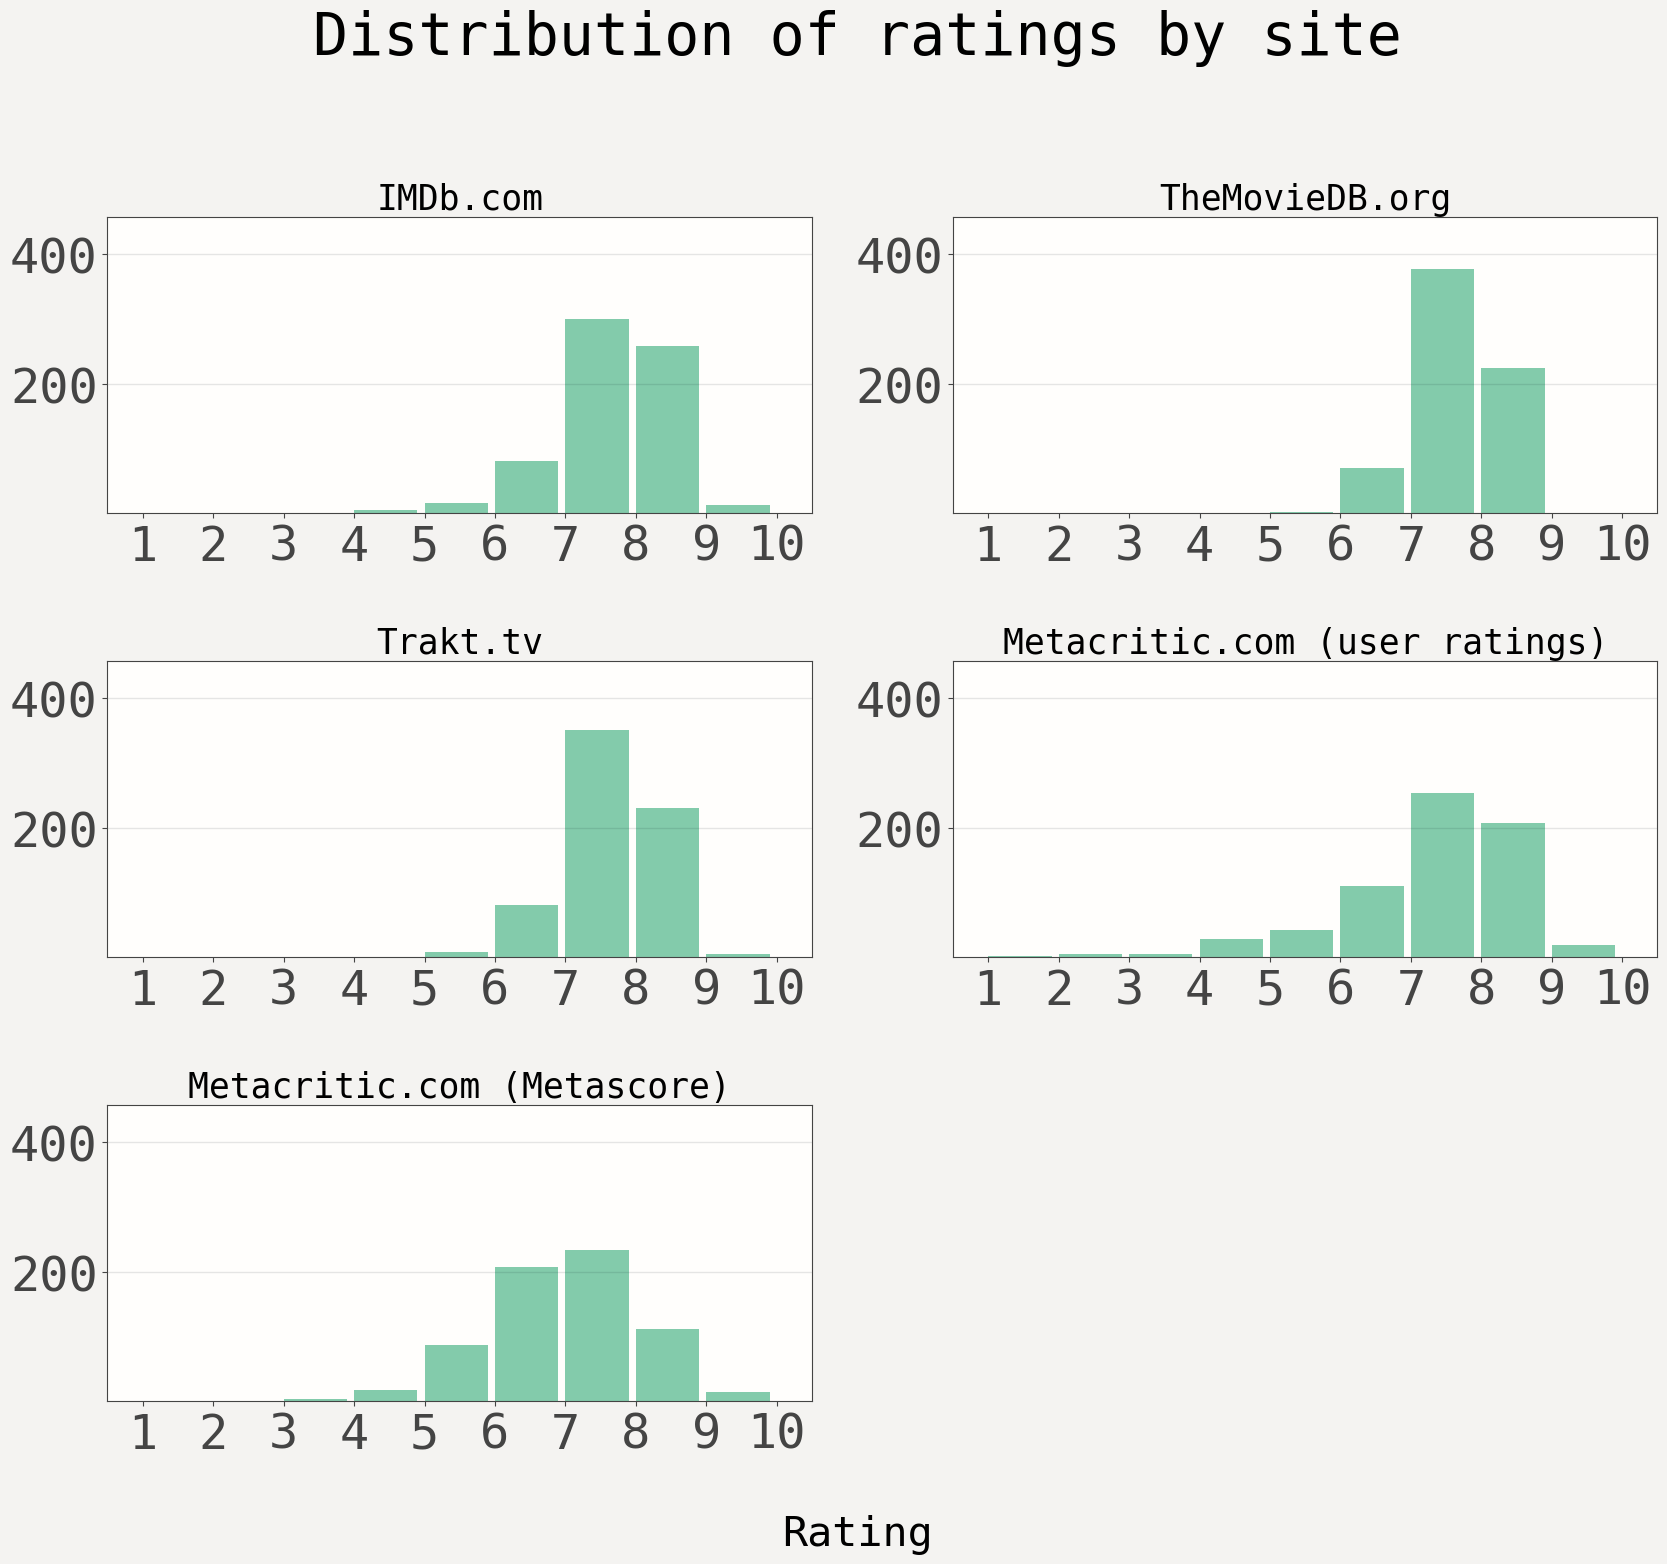

In [75]:
#df[['imdb_rating','tmdb_rating', 'trakt_rating', 'metacritic_rating','metascore']].hist()

fig = plt.figure(figsize = (20, 16),facecolor='#F4F3F1')
ax = plt.axes()
  


font = {'family' : 'monospace',
        'size'   : 35}

params = {"ytick.color" : "#444444",
          "xtick.color" : "#444444",
          "axes.labelcolor" : "#444444",
          "axes.edgecolor" : "#444444"}
plt.rcParams.update(params)


matplotlib.rc('font', **font)
plt.margins(y= 0.01)
right_side = plt.gca().spines["right"]
top_side = plt.gca().spines["top"]
left_side = plt.gca().spines["left"]
left_side.set_visible(False)
top_side.set_visible(False)
right_side.set_visible(False)
plt.tick_params(left=False)

plots = ['IMDb', 'TMDB', 'Trakt', 'Metacritic', 'Metascore']
plot_titles = ['IMDb.com', 'TheMovieDB.org', 'Trakt.tv',
              'Metacritic.com (user ratings)', 'Metacritic.com (Metascore)']
max_y = 0
num_rows = int(len(plots) / 2)+1
print(int(len(plots) / 2))
for i,plot in enumerate(plots):
    plt.subplot(num_rows, 2, i+1,facecolor='#FFFEFC')
    x = df[plot.lower() + '_rating']
    plt.gca().axes.grid(which='major', axis='y', linewidth=1, linestyle='-', color='#001219', alpha=0.1)
    n, bins, patches = plt.hist(x, color='#83cbab', bins=np.arange(1.0, 12.0, 1), width=0.9)
    plt.title(plot_titles[i],fontsize=25)
    max_y = max(max_y+10, max(n))  # Get the maximum count from each histogram
    plt.xticks(np.arange(1, 11, 1), np.arange(1, 11, 1))  # Adjust tick positions as needed
    plt.xlim(0.5, 10.5)

# Same y-axis limit for all subplots
for i in range(1, len(plots) + 1):
    plt.subplot(num_rows, 2, i)
    plt.yticks(np.arange(0, 450, 200), np.arange(0, 450, 200))
    plt.ylim(1, max_y + 50)  # Adjust 5 to set extra space above the maximum count

    
plt.subplots_adjust(hspace=0.5, wspace=0.2, top=.85)

plt.suptitle("Distribution of ratings by site")
fig.text(0.5, 0.02, 'Rating', ha='center', fontsize=30)

plt.show()

In [87]:
# Adjust the means of the differnt sites
tmdb_diff = mean_excluding_items.imdb_rating - mean_excluding_items.tmdb_rating
trakt_diff = mean_excluding_items.imdb_rating - mean_excluding_items.trakt_rating
metacritic_diff = mean_excluding_items.imdb_rating - mean_excluding_items.metacritic_rating
print(tmdb_diff, trakt_diff, metacritic_diff)
amazon_df['tmdb_rating'] = amazon_df['tmdb_rating'].apply(lambda x: x + tmdb_diff)
amazon_df['trakt_rating'] = amazon_df['trakt_rating'].apply(lambda x: x + trakt_diff)
amazon_df['metacritic_rating'] = amazon_df['metacritic_rating'].apply(lambda x: x + metacritic_diff)

amazon_df.mean()


0.036060606060606126 0.02651515151515138 0.3260909090909099


/tmp/ipykernel_264948/1573661471.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amazon_df.mean()


startYear                2022.000000
imdb_rating                 7.329412
imdb_numVotes          108687.529412
tmdb_rating                 7.578004
trakt_rating                7.294207
trakt_numVotes           3428.176471
metacritic_rating           7.396299
metacritic_numVotes       604.176471
metascore_rating            6.918824
review_count               24.705882
dtype: float64

In [86]:
melted_data = pd.melt(amazon_df, id_vars=['tconst'], value_vars=['imdb_rating', 'metacritic_rating', 'tmdb_rating', 'trakt_rating'],
                      var_name='site', value_name='rating')
transformed_data, lambda_value = boxcox(melted_data['rating'])
melted_data['transformed_rating'] = transformed_data


group1 = melted_data[melted_data['site'] == 'imdb_rating']['transformed_rating']
group2 = melted_data[melted_data['site'] != 'imdb_rating']['transformed_rating']

# Shapiro-Wilk test
statistic, p_value = shapiro(group1)
print(f"Test Statistic: {statistic}, p-value: {p_value}")
statistic, p_value = shapiro(group2)
print(f"Test Statistic: {statistic}, p-value: {p_value}")

# Perform Levene's test
statistic, p_value = levene(group1, group2)
print(f"Levene's Test Statistic: {statistic}, P-value: {p_value}")

Test Statistic: 0.9526444673538208, p-value: 0.4996638894081116
Test Statistic: 0.9755048155784607, p-value: 0.3686506152153015
Levene's Test Statistic: 0.11560019946316394, P-value: 0.7349360128734139


In [84]:
t_statistic, p_value = ttest_ind(melted_data[melted_data['site'] == 'imdb_rating']['transformed_rating'], melted_data[melted_data['site'] != 'imdb_rating']['transformed_rating'])
print("ttest all:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


ttest all:
T-statistic: 0.0593186951627264
P-value: 0.9528775162894174
